### Imports

importing Jupyter notebook from vector_valued_with_RFF.ipynb

 Function K_gauss took 1.5040 seconds

 Function K_gauss took 1.6194 seconds

 Function alpha took 1.7726 seconds

 Function estimated_function took 3.2013 seconds

 Function alpha_approx took 0.0026 seconds

 Function function_approximation took 0.0607 seconds


<string>:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<string>:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<string>:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<string>:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


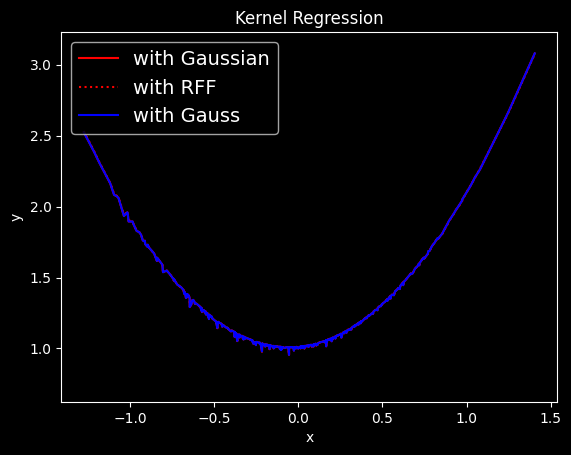

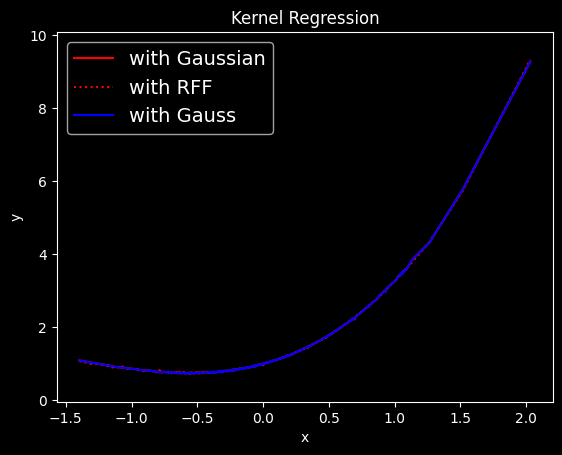

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as ipw
from numpy.random import randn, randint
import plotly.figure_factory as ff

import import_ipynb
import vector_valued_with_RFF

from vector_valued_with_RFF import capital_psi, alpha_approx

### Simulation parameters

In [3]:
w_0 = 0.1*2*np.pi
zeta = 1/np.sqrt(2)
# np.zeroes_like - return array of zeros w. same shape and type as a given array

time_start = 0
time_end = 100
time_step = 0.05 # this gives 2000 steps

time_series = np.arange(time_start, time_end, time_step)

number_of_timesteps = len(time_series)

init_condition = np.array([2, -2])

size_of_state = 2

### Van der Pol Oscillator

In [4]:
epsilon = 2

def model_van_der_pol(t, x):
    list = [x[1], epsilon * (1 - x[0]**2) * x[1] - x[0]]
    return np.array(list)

In [5]:
# Solve diff. equations with ODE
# similar to ODE45 in python: results = solve_ivp(obj_func, t_span, y0, t_eval = time_series)

# noise for a bit of challange
noise_sigma = 0.1

# init data containers
x = np.zeros((size_of_state, number_of_timesteps))
y = np.zeros((size_of_state, number_of_timesteps))

x[:, 0] = init_condition + np.multiply(noise_sigma, np.array(randn(size_of_state)))
y[:, 0] = model_van_der_pol(time_start, init_condition)

for i in range(0, number_of_timesteps - 1):
    timespan = [time_series[i], time_series[i + 1]]
    start_state = x[:, i]

    # Sample dynamics at current time step
    y[:, i] = model_van_der_pol(time_series[i], start_state)
    
    # Propogate the state trajectory to next the time step using ODE-solver
    # solve_ivp is to replace the ode45 - solving odes
    partial_trajectory = solve_ivp(model_van_der_pol, timespan, start_state).y
    
    x[:, i+1] = partial_trajectory[:, -1] + np.multiply(noise_sigma, np.array(randn(size_of_state)))

### Free Harmonic Oscillator

In [6]:
def model_free_harmonic_oscillator(func, t, zeta, w_0):
    """Free Harmonic Oscillator ODE (Ordinary Differential equation)"""
    pass

### Generate data for vector field and streamlines

In [17]:
lower_bound_x1 = -4
upper_bound_x1 = 4
lower_bound_x2 = -4
upper_bound_x2 = 4

num_of_points = 11

x1 = np.linspace(lower_bound_x1, upper_bound_x1, num_of_points)
x2 = np.linspace(lower_bound_x2, upper_bound_x2, num_of_points)

# Base point or starting points for each vector of the vector field
[X1, X2] = np.meshgrid(x1, x2)

# Calculate df/dt for each point
t = 0

u = np.zeros(X1.shape)
v = np.zeros(X1.shape)
u_norm = np.zeros(X1.shape)
v_norm = np.zeros(X1.shape)

for (i,j), value in np.ndenumerate(X1):
    # get velocities at each point
    Y_prime = model_van_der_pol(t, np.array([value, X2[i, j]]))
    u[i,j] = Y_prime[0]
    v[i,j] = Y_prime[1]

    # normalize vector length
    V_mod = np.sqrt(u[i,j]**2 + v[i,j]**2)
    u_norm[i,j] = u[i,j] / V_mod
    v_norm[i,j] = v[i,j] / V_mod

C:\Users\Heli\AppData\Local\Temp\ipykernel_21592\980544796.py:30: RuntimeWarning: invalid value encountered in double_scalars
  u_norm[i,j] = u[i,j] / V_mod
C:\Users\Heli\AppData\Local\Temp\ipykernel_21592\980544796.py:31: RuntimeWarning: invalid value encountered in double_scalars
  v_norm[i,j] = v[i,j] / V_mod


### Plot Van der Pol model

(-4.0, 4.0)

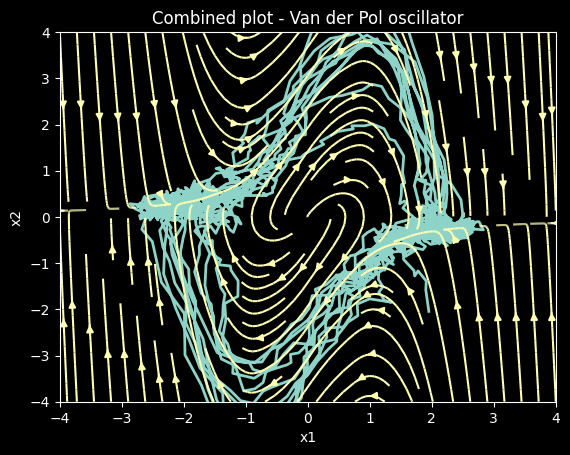

In [18]:
# Plot resulting trajectory in the data set and belonging streamlines
# Combine solution and vector field
plt.figure()
plt.title('Combined plot - Van der Pol oscillator')
plt.plot(x[0,:],x[1,:],'-', linewidth=2)

#ff.create_streamline(X1, X2, u, v)
plt.streamplot(X1, X2, u, v, density = 1)
plt.quiver(x[0,:], x[1,:], y[0,:], y[1,:])
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim([lower_bound_x1, upper_bound_x1])
plt.ylim([lower_bound_x2, upper_bound_x2])

### Regression problem

In [9]:
# Extract data series for y in the regression problem
data_series_start = np.argwhere(time_series == 15)[0,0] # to take the first element
data_series_end = np.argwhere(time_series == 22.6)[0,0]

# Training data
x_train = x[:,  data_series_start:data_series_end]
y_train = y[:,  data_series_start:data_series_end]

# Query only the length of the second dimension of x_train

num_of_points = x_train.shape[1]
dim_of_function = y_train.shape[0]

#### Plot resulting trajectory in the data set and belonging streamlines

ValueError: x and y can be no greater than 2D, but have shapes (2, 1, 1) and (2, 1, 1)

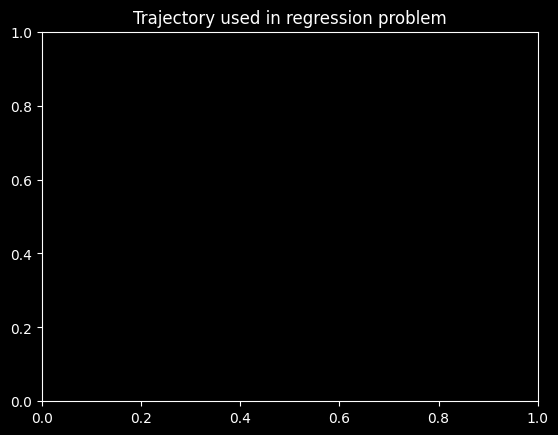

In [10]:
plt.figure()
plt.title('Trajectory used in regression problem')
plt.plot(x_train[0,:], x_train[1,:],'.', Linewidth=2)
plt.quiver(x_train[0,:],x_train[1,:],y_train[0,:],y_train[1,:])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Trajectory', 'Velocities'])
plt.xlim([lower_bound_x1, upper_bound_x1])
plt.ylim([lower_bound_x2, upper_bound_x2])

### Regression

In [14]:
# Random Fourier Features
sigma = 5
num_of_samples = 20
# ./ means right array division

#TODO: double check w & b
w = randn(size_of_state, num_of_samples) / sigma
b = np.dot(randint(1, num_of_samples*2), np.pi)

# func for capital_psi

# get alphas (coefficient vectors)
lamba = 0.000001 # regularization parameter lamda

alpha_array_rff= alpha_approx(x_train,y_train)
#,lambda,capital_psi, number_of_points,number_of_samples,dim_of_function)



def learnt_model(t, x_j):
    return capital_psi(x_j).T * alpha_array_rff

TypeError: alpha_approx() missing 3 required positional arguments: 'dim', 'm', and 'lam'

### Simulation paramters

In [11]:
init_time = 0
end_time = 50
timespan = [init_time, end_time]
init_condition = [2, -2]

# Solve diff. equations using learnt model with solve_ivp
data_series = solve_ivp(learnt_model, timespan, init_condition).y


NameError: name 'learnt_model' is not defined

### Plot simulated trajectory and streamslices for learnt model


In [ ]:
u_learnt = np.zeros(X1.shape)
v_learnt = np.zeros(X1.shape)

# for loop to get the velocity at each point witht the learnt model
for i in range():
    pass

plt.figure()
plt.title('Combined plot - Learnt model')
plt.plot(data_series[:, 0], data_series[:, 1], '-', Linewidth=2)
plt.streamplot(X1, X2, u_learnt, v_learnt)
# (...)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Trajectory', 'Streamlines'])
plt.xlim([lower_bound_x1, upper_bound_x1])
plt.ylim([lower_bound_x2, upper_bound_x2])